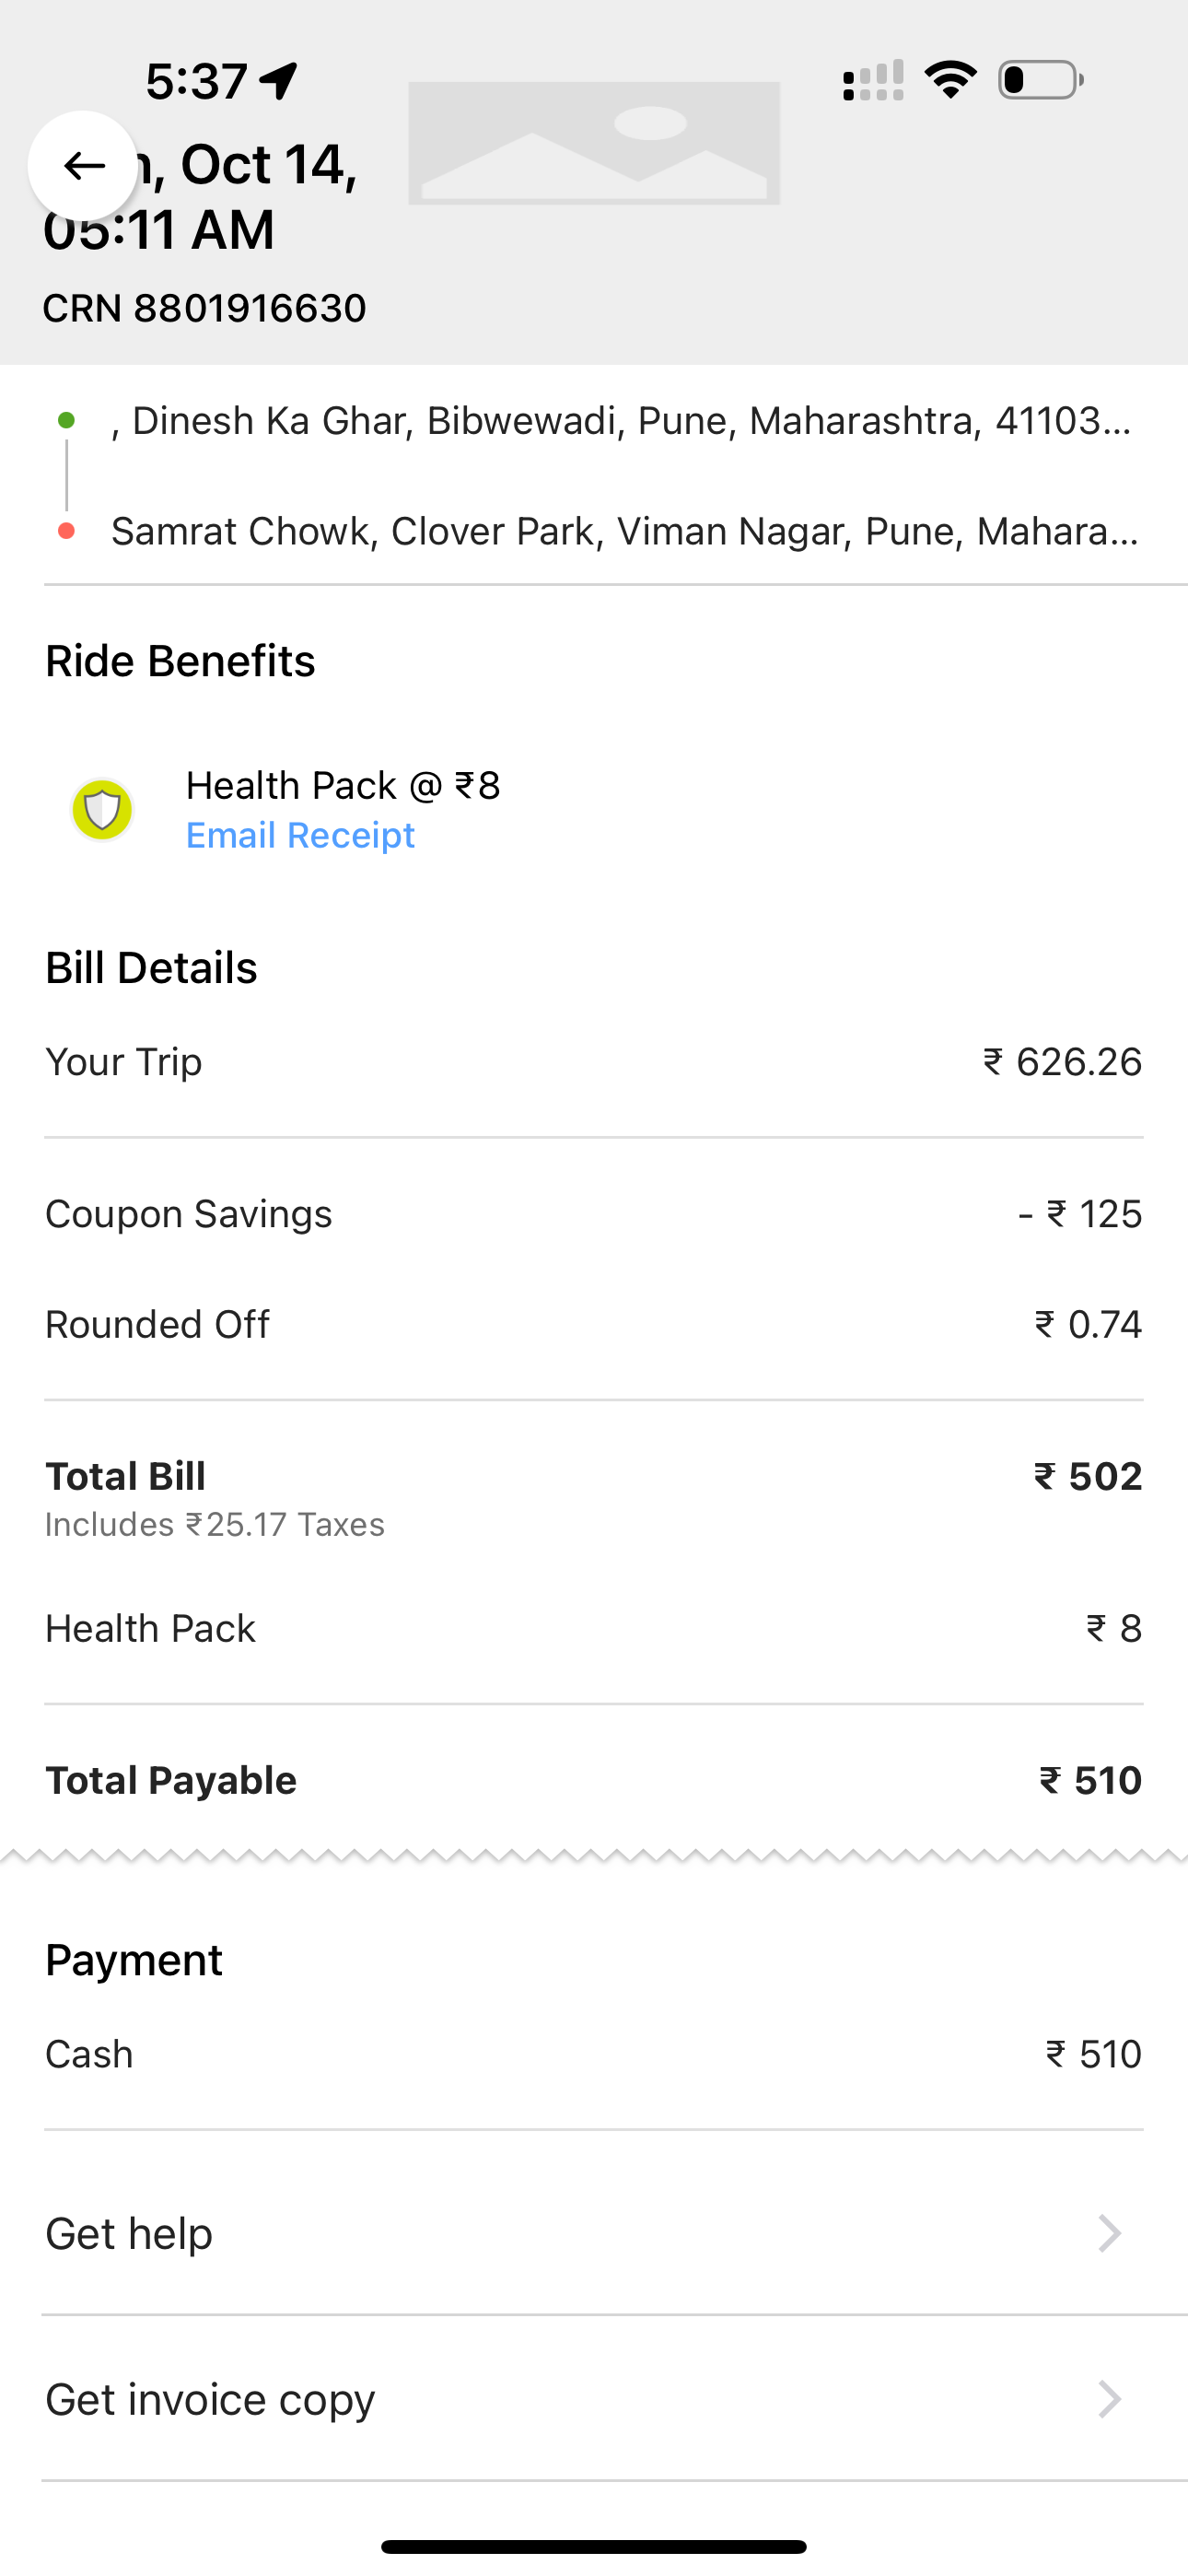

In [8]:

import requests
from PIL import Image

url = "/home/admin-pc/Downloads/ola_from_home_to_samrat_chowk(office).PNG"
image = Image.open(url).convert("RGB")
image

In [4]:
from transformers import TrOCRProcessor

processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
# calling the processor is equivalent to calling the feature extractor
pixel_values = processor(image, return_tensors="pt").pixel_values
print(pixel_values.shape)
     

preprocessor_config.json:   0%|          | 0.00/224 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

torch.Size([1, 3, 384, 384])


In [5]:
from transformers import VisionEncoderDecoderModel

model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")

config.json:   0%|          | 0.00/4.17k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": false,
  "transformers_version": "4.46.2"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 768,
  "d_model": 1024,
  "decoder_attention_heads": 16,
  "decoder_ffn_dim": 4096,
  "decoder

generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [9]:
# calling the processor is equivalent to calling the feature extractor
pixel_values = processor(image, return_tensors="pt").pixel_values
print(pixel_values.shape)

torch.Size([1, 3, 384, 384])


In [10]:
generated_ids = model.generate(pixel_values)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print(generated_text)

0 1


In [7]:
generated_text

'3 .'

In [15]:
# load image from the IAM dataset
url = "/home/admin-pc/Downloads/shop_owner_app.jpg"
image = Image.open(url).convert("RGB")

pixel_values = processor(image, return_tensors="pt").pixel_values
generated_ids = model.generate(pixel_values)

generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

In [16]:
generated_text

'1977 1977 NFL Draft of the Year'

In [1]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image

# Load the model and processor
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")


Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": false,
  "transformers_version": "4.46.2"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 768,
  "d_model": 1024,
  "decoder_attention_heads": 16,
  "decoder_ffn_dim": 4096,
  "decoder

In [10]:
from PIL import Image, ImageEnhance
# Load your image
image_path = "/home/admin-pc/Downloads/shop_name_final.jpg"
image = Image.open(image_path)
# # Optional: Enhance image (if needed, you can try adjusting brightness, contrast, etc.)
# # Increase the contrast (can improve text visibility)
# enhancer = ImageEnhance.Contrast(image)
# image = enhancer.enhance(2.0)

# # Resize the image if it's very large or small
# image = image.resize((image.width // 2, image.height // 2))  # resizing to half of the original size (adjust as necessary)


# Ensure the image is in RGB format
image = image.convert("RGB")

# Preprocess the image
inputs = processor(images=image, return_tensors="pt")

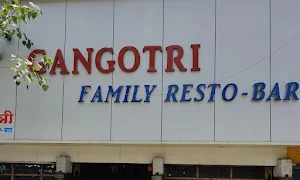

In [12]:
image

In [11]:
# Run inference to get predictions
generated_ids = model.generate(inputs.pixel_values)

# Decode the predictions to get the text
generated_text = processor.decode(generated_ids[0], skip_special_tokens=True)

# Output the result
print(generated_text)

psychologists to the


In [13]:
!pip install easyocr


  Using cached lazy_loader-0.4-py3-none-any.whl.metadata (7.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 5.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 6.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 5.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 6.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.6/286.6 kB 6.5 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 5.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 6.9 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.4/315.4 kB 6.3 MB/s eta 0:00:00ta 0:00:01
Using cached lazy_loader-0.4-py3-none-any.whl (12 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 6.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.9/220.9 kB 12.7 MB/s eta 0:00:00


In [2]:
import easyocr
from PIL import Image

# Initialize the EasyOCR reader (you can specify the languages if needed)
reader = easyocr.Reader(['en'])  # For English, you can add more languages as needed




Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [9]:
# Path to your image
image_path = "output_images/page_dd675952185b.jpg"

# Read text from the image
result = reader.readtext(image_path)

# Print the detected text
x=[]
for detection in result:
    print(f"Detected text: {detection[1]}")
    x.append(detection[1])
    # with open("mytxt.txt", "a") as g:
    #     g.write(detection + "\n")  # Appends the text with a newline


Detected text: 4:50
Detected text: Order Details
Detected text: 0 Support
Detected text: AK. Juice Center
Detected text: Nariman Point; Mumbai
Detected text: Download invoice
Detected text: Download summary
Detected text: This order was delivered
Detected text: Your Order
Detected text: Mark as favourite
Detected text: Chikoo Milkshake
Detected text: Quantity: Full
Detected text: 1
Detected text: x?140
Detected text: 7140
Detected text: Item total
Detected text: 8140
Detected text: Taxes
Detected text: ?8.08
Detected text: Delivery charge
Detected text: 253 ?38
Detected text: Donate ?5 to
Detected text: Feeding India
Detected text: 85.00
Detected text: Platform fee
Detected text: F6.00
Detected text: Grand Total
Detected text: 8197.08
Detected text: Your total savings
Detected text: 815
Detected text: Order Details
Detected text: ORDER NUMBER
Detected text: 6113265046
Detected text: PAYMENT
Detected text: Paid :
Detected text: Upi (197.08)
Detected text: DATE
Detected text: August 22, 

In [10]:
x

['4:50',
 'Order Details',
 '0 Support',
 'AK. Juice Center',
 'Nariman Point; Mumbai',
 'Download invoice',
 'Download summary',
 'This order was delivered',
 'Your Order',
 'Mark as favourite',
 'Chikoo Milkshake',
 'Quantity: Full',
 '1',
 'x?140',
 '7140',
 'Item total',
 '8140',
 'Taxes',
 '?8.08',
 'Delivery charge',
 '253 ?38',
 'Donate ?5 to',
 'Feeding India',
 '85.00',
 'Platform fee',
 'F6.00',
 'Grand Total',
 '8197.08',
 'Your total savings',
 '815',
 'Order Details',
 'ORDER NUMBER',
 '6113265046',
 'PAYMENT',
 'Paid :',
 'Upi (197.08)',
 'DATE',
 'August 22, 2024 at 01:05 PM',
 'Repeat Order',
 'DcLIVCN',
 'Room number : 703 Earivas hotel_arthur bandar road,',
 '',
 'I',
 '',
 'Fo',
 '',
 'U',
 '',
 'L',
 'Using']

In [18]:
import os
os.environ["GROQ_API_KEY"] = "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"

In [26]:
from groq import Groq
import base64


# Function to encode the image
def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

# Path to your image
image_path = "/home/admin-pc/Downloads/pubmon.pdf"

# Getting the base64 string
base64_image = encode_image(image_path)

client = Groq()

chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": [
                {"type": "text", "text": "what you see in image based pdf, perform ocr"},
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/jpeg;base64,{base64_image}",
                    },
                },
            ],
        }
    ],
    model="llama-3.2-11b-vision-preview",
)

print(chat_completion.choices[0].message.content)


BadRequestError: Error code: 400 - {'error': {'message': 'invalid image data', 'type': 'invalid_request_error'}}

In [29]:
from langchain_community.document_loaders import PyPDFLoader

loader = PyPDFLoader("/home/admin-pc/Downloads/Raven_Ai_T_C .pdf")
pages = []
async for page in loader.alazy_load():
    pages.append(page)

In [30]:
pages

[Document(metadata={'source': '/home/admin-pc/Downloads/Raven_Ai_T_C .pdf', 'page': 0}, page_content='')]

In [41]:
!pip install python-docx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 3.9 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.8.0
    Uninstalling typing_extensions-4.8.0:
      Successfully uninstalled typing_extensions-4.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
manim 0.18.0 requires Pillow<10.0,>=9.1, but you have pillow 10.4.0 which is incompatible.


In [250]:
from pdf2image import convert_from_path
from PIL import Image
from docx import Document
import os
import uuid

def file_to_images(file_path, output_dir="output_images"):
    """
    Convert any supported file into images and save them to a directory.

    Args:
        file_path (str): Path to the input file.
        output_dir (str): Directory to save the output images.
    
    Returns:
        list: List of image file paths.
    """
    # Ensure output directory exists
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    file_extension = file_path.split('.')[-1].lower()
    output_files = []

    try:
        if file_extension == "pdf":
            # Convert PDF to images
            images = convert_from_path(file_path, dpi=300)
            for i, img in enumerate(images):
                uid = str(uuid.uuid4()).split("-")[-1]
                img_path = os.path.join(output_dir, f"page_{uid}.jpg")
                img.save(img_path, "JPEG")
                output_files.append(img_path)
        
        elif file_extension in ["doc", "docx"]:
            # Convert Word document to images
            doc = Document(file_path)
            text_content = "\n".join([p.text for p in doc.paragraphs])
            
            # Create an image for each page of text (approximation)
            img = Image.new("RGB", (800, 600), "white")
            from PIL import ImageDraw
            draw = ImageDraw.Draw(img)
            draw.multiline_text((10, 10), text_content, fill="black")

            img_path = os.path.join(output_dir, "document.jpg")
            img.save(img_path, "JPEG")
            output_files.append(img_path)
        
        elif file_extension in ["jpg", "jpeg", "png", "bmp", "tiff"]:
            # Handle image formats
            img = Image.open(file_path)
            img_path = os.path.join(output_dir, os.path.basename(file_path))
            img.save(img_path)  # Save a copy in the output directory
            output_files.append(img_path)
        
        else:
            raise ValueError("Unsupported file type. Only PDF, DOC, DOCX, and image files are supported.")
    
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")
    
    return output_files

# Example Usage
# input_path = "/home/admin-pc/Downloads/Pubmon_alarka.pdf"
# domain_name = "finance"  # Replace with the file path
# output_images = file_to_images(file_path)
# print("Generated Images:", output_images)




In [251]:
input_directory = "input_dir"
extensions = (".pdf", ".docx", ".txt", "jpg", "jpeg", "png", "bmp", "tiff")
def load_file(input_directory,domain_name):
    domain_specific_images = {}
    domain_specific_images[domain_name]={}
    for file in os.listdir(input_directory):
        print(file)
        if file.endswith(extensions):
            file_path = os.path.join(input_directory, file)
            img=file_to_images(file_path)
            domain_specific_images[domain_name][file] = img
    return domain_specific_images        

In [252]:
domain_specific_images=load_file(input_directory,"finance")

2cc936a5fe0e.pdf


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


3c605325d96a.pdf


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


2f2c522d9db4.pdf


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


0ff85a3c9297.pdf


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


3db91badba52.pdf


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [253]:
domain_specific_images

{'finance': {'2cc936a5fe0e.pdf': ['output_images/page_2d15d906f75d.jpg'],
  '3c605325d96a.pdf': ['output_images/page_7bc80d9bfca4.jpg'],
  '2f2c522d9db4.pdf': ['output_images/page_7269456df4e4.jpg'],
  '0ff85a3c9297.pdf': ['output_images/page_5c0a1947f16d.jpg'],
  '3db91badba52.pdf': ['output_images/page_596ba2f02e31.jpg']}}

In [254]:
from groq import Groq
import base64


# Function to encode the image
def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

# Path to your image
# images = output_images

# Getting the base64 string
base64_image = encode_image(image_path)

client = Groq()

text_from_images = {}
text_from_images["metadata"]={}
text_from_images["images"]={}
for domain, files in domain_specific_images.items():
    for file in files.keys():
        for image in domain_specific_images[domain][file]:
            print(image)
            base64_image = encode_image(image)
            chat_completion = client.chat.completions.create(
                messages=[
                    {
                        "role": "user",
                        "content": [
                            {"type": "text", "text": "You are an OCR tool. Extract all text from the provided image and format it neatly."},
                            {"type": "text", "text": "Ensure the output is structured properly, retaining line breaks, paragraphs, and any tabular data (if present)."},
                            {"type": "text", "text": "Provide the extracted text without missing any content, and ensure it's readable."},
                            {
                                "type": "image_url",
                                "image_url": {
                                    "url": f"data:image/jpeg;base64,{base64_image}",
                                },
                            },
                        ],
                    }
                ],
                model="llama-3.2-11b-vision-preview",
            )
            print(type(chat_completion.choices[0].message.content))
            text_from_images["metadata"]["domain"] = domain
            text_from_images["images"][image] = chat_completion.choices[0].message.content

print(text_from_images)


output_images/page_2d15d906f75d.jpg
<class 'str'>
output_images/page_7bc80d9bfca4.jpg
<class 'str'>
output_images/page_7269456df4e4.jpg
<class 'str'>
output_images/page_5c0a1947f16d.jpg
<class 'str'>
output_images/page_596ba2f02e31.jpg
<class 'str'>
{'metadata': {'domain': 'finance'}, 'images': {'output_images/page_2d15d906f75d.jpg': "The provided image contains a document with text and tables, which I will attempt to extract and format neatly as requested.\n\n**Extracted Text:**\n\n**Pivotchain Solution Technologies Pvt Ltd**\n\n' JulianApps Chambers, 3rd Floor,\nOffice No 301, New Canganj Chowk,\nViman Nagar, Pune, Maharashtra - 411054\n\nEmail: nalin@spit-payments@pivetchain.com\n\n**Invoice**\n\n**GSTIN**\n27AACPR2676125\n\n**Invoice Date**\n30/07/2024\n\n**Invoice No**\n00/11/00011\n\n**Invoice No Payment Mode**\nNB\n\n**Invoice Details**\n\n**IRN**\n895e53b7f61a54d545a76ac23a376a37a3add3e8e682e2f955418f47c1a23d\n\n**Ack. No.**\n122424814019\n\n**2024-07-30 16:53:00**\n\n**Billing

In [255]:
text_from_images

{'metadata': {'domain': 'finance'},
 'images': {'output_images/page_2d15d906f75d.jpg': "The provided image contains a document with text and tables, which I will attempt to extract and format neatly as requested.\n\n**Extracted Text:**\n\n**Pivotchain Solution Technologies Pvt Ltd**\n\n' JulianApps Chambers, 3rd Floor,\nOffice No 301, New Canganj Chowk,\nViman Nagar, Pune, Maharashtra - 411054\n\nEmail: nalin@spit-payments@pivetchain.com\n\n**Invoice**\n\n**GSTIN**\n27AACPR2676125\n\n**Invoice Date**\n30/07/2024\n\n**Invoice No**\n00/11/00011\n\n**Invoice No Payment Mode**\nNB\n\n**Invoice Details**\n\n**IRN**\n895e53b7f61a54d545a76ac23a376a37a3add3e8e682e2f955418f47c1a23d\n\n**Ack. No.**\n122424814019\n\n**2024-07-30 16:53:00**\n\n**Billing Address**\n\nName\nLIFE PRO CONSULTING LLP\n\nMobile\n+91-8956262884\n\n**GSTIN**\n27AACPR2676125\n\n**City/PIN**\nLucknow-226010\n\n**Billing Address**\nLIFE PRO CONSULTING LLP\n+91-8956262884\n27AACPR2676125\nLucknow-226010\n\n**Chy-PIN** UPITAR 

In [257]:
text_from_images

{'metadata': {'domain': 'finance'},
 'images': {'output_images/page_2d15d906f75d.jpg': 'The provided image contains a document with text and tables which I will attempt to extract and format neatly as requested. Extracted Text Pivotchain Solution Technologies Pvt Ltd  JulianApps Chambers 3rd Floor Office No 301 New Canganj Chowk Viman Nagar Pune Maharashtra  411054 Email nalinspitpaymentspivetchain.com Invoice GSTIN 27AACPR2676125 Invoice Date 30072024 Invoice No 001100011 Invoice No Payment Mode NB Invoice Details IRN 895e53b7f61a54d545a76ac23a376a37a3add3e8e682e2f955418f47c1a23d Ack. No. 122424814019 20240730 165300 Billing Address Name LIFE PRO CONSULTING LLP Mobile 918956262884 GSTIN 27AACPR2676125 CityPIN Lucknow226010 Billing Address LIFE PRO CONSULTING LLP 918956262884 27AACPR2676125 Lucknow226010 ChyPIN UPITAR PRADESH 09 09 09 State UTTAR PRADESH Address jormall nagar 558B vikas khand co Ramesh kumar mishra Railway Station Road Uttar Pradesh Lucknow Mobile 518956262884 Home Utt

In [256]:
###clean the documents/page content if required

"""Description 
    Clean the input text by removing unnecessary whitespace, non-alphanumeric characters, 
    and trimming leading/trailing spaces.

    This function performs the following operations:
    1. Replaces multiple consecutive whitespace characters (spaces, newlines, tabs) 
       with a single space.
    2. Removes all non-alphanumeric characters, retaining only letters (a-z, A-Z), 
       numbers (0-9), and spaces.
    3. Strips leading and trailing spaces from the text.
"""

import re  # Import the regular expression module for text processing

# Define a function to clean the text
def clean_text(text):
    # Remove extra whitespaces, newlines, and tabs by replacing all whitespace characters with a single space
    text = re.sub(r'\s+', ' ', text)  # This matches one or more whitespace characters (spaces, newlines, tabs) and replaces them with a single space
    
    # Remove non-alphanumeric characters (except spaces and decimal points in numbers)
    text = re.sub(r'[^a-zA-Z0-9\s.]', '', text)  # This matches any character that is not a letter (a-z, A-Z), a number (0-9), space (\s), or period (.)
    
    # Remove leading and trailing spaces from the text
    text = text.strip()  # The .strip() method removes any whitespace at the start and end of the text
    
    return text  # Return the cleaned text



# Clean the text from the extracted images
for key,value in text_from_images["images"].items():
    # Clean the text
    text_from_images["images"][key] = clean_text(value)
    

In [258]:
import chromadb
from sentence_transformers import SentenceTransformer
import os

# Initialize Chroma client
client = chromadb.Client()

# Set up or create a collection in Chroma
collection_name = "image_text_extraction"
collection = client.create_collection(collection_name) if collection_name not in [col.name for col in client.list_collections()] else client.get_collection(collection_name)


In [94]:
[client.list_collections()[0].name]

['image_text_extraction']

In [87]:
for i in client.list_collections():
    print(i.name)

image_text_extraction


In [261]:
# Initialize the model to generate text embeddings
model_embd = SentenceTransformer("all-MiniLM-L6-v2")

In [262]:
# Generate embeddings for all descriptions

import uuid
def Generate_embeddings_and_save_to_chromadb(model,descriptions):
    #Insert data into the Chroma collection
    for key,value in descriptions["metadata"].items():
        for k,v in descriptions["images"].items():
            print(v,"descr")
            embedding = model_embd.encode(v)
            collection.add(
                documents=[v],
                metadatas=[{key:value,"image_path":k}],
                embeddings=[embedding],
                ids=[str(uuid.uuid4())]  # Use unique IDs for each chunk
            )

        

In [263]:
Generate_embeddings_and_save_to_chromadb(model,text_from_images)

The provided image contains a document with text and tables which I will attempt to extract and format neatly as requested. Extracted Text Pivotchain Solution Technologies Pvt Ltd  JulianApps Chambers 3rd Floor Office No 301 New Canganj Chowk Viman Nagar Pune Maharashtra  411054 Email nalinspitpaymentspivetchain.com Invoice GSTIN 27AACPR2676125 Invoice Date 30072024 Invoice No 001100011 Invoice No Payment Mode NB Invoice Details IRN 895e53b7f61a54d545a76ac23a376a37a3add3e8e682e2f955418f47c1a23d Ack. No. 122424814019 20240730 165300 Billing Address Name LIFE PRO CONSULTING LLP Mobile 918956262884 GSTIN 27AACPR2676125 CityPIN Lucknow226010 Billing Address LIFE PRO CONSULTING LLP 918956262884 27AACPR2676125 Lucknow226010 ChyPIN UPITAR PRADESH 09 09 09 State UTTAR PRADESH Address jormall nagar 558B vikas khand co Ramesh kumar mishra Railway Station Road Uttar Pradesh Lucknow Mobile 518956262884 Home Uttar Pradesh State Address jormall nagar 558B vikas khand co Ramesh kumar mishra Railway S

The image contains a document with text and a QR code. The text is divided into sections including a header a section for GSTIN Invoice Date Invoice Number IRN Ack. No. and a table with various columns. The table includes columns for Name Mobile No. State Address SM DescriptionHSN Qty piece Rate Taxable Value GST No CGST SGST COSG Total Value and Total Amt. Here is the extracted text in a readable format retaining line breaks paragraphs and tabular data Header Alarka Infra Solution Pvt Ltd Ms code AB350262531 Plus code 3JZ489 Village Opp. Fish Market Market Manveli Road West Maharastra  400095 Email poomalaralarkainfrasolution.com GSTIN Section GSTIN 27AARC05975A122F Invoice Date 13062024 Invoice Number 202442292275377 Transaction Id 202442292275377 Table  Name  Mobile No.  State  Address  SM  DescriptionHSN Qty piece  Rate  Taxable Value  GST No  SGST  COSG  Total Value  Total Amt                                PIVOTCHAIN SOLUTION TECHNOLOGIES PRIVATE LIMITED  91 9356628084  MAHARASHT

In [264]:
# Fetch all entries
all_entries = collection.get()

In [265]:
all_entries

{'ids': ['df969347-3222-4ef9-8f0b-e22e35232a7b',
  '0f8fe38f-26b9-4e96-968c-b5ad23dc9275',
  '468d3f73-d0c9-484b-bf90-b0838283b1be',
  '6fb52a75-8165-45a9-898c-a2c6608e91ef',
  '2a3a47d8-b253-4ee1-9227-ebc3a41d5c67'],
 'embeddings': None,
 'documents': ['The provided image contains a document with text and tables which I will attempt to extract and format neatly as requested. Extracted Text Pivotchain Solution Technologies Pvt Ltd  JulianApps Chambers 3rd Floor Office No 301 New Canganj Chowk Viman Nagar Pune Maharashtra  411054 Email nalinspitpaymentspivetchain.com Invoice GSTIN 27AACPR2676125 Invoice Date 30072024 Invoice No 001100011 Invoice No Payment Mode NB Invoice Details IRN 895e53b7f61a54d545a76ac23a376a37a3add3e8e682e2f955418f47c1a23d Ack. No. 122424814019 20240730 165300 Billing Address Name LIFE PRO CONSULTING LLP Mobile 918956262884 GSTIN 27AACPR2676125 CityPIN Lucknow226010 Billing Address LIFE PRO CONSULTING LLP 918956262884 27AACPR2676125 Lucknow226010 ChyPIN UPITAR PRA

In [266]:
results = collection.get(
    where={
        "domain": {"$eq": "finance"}  # Using $eq operator for equality check
    }
)

In [267]:
results

{'ids': ['df969347-3222-4ef9-8f0b-e22e35232a7b',
  '0f8fe38f-26b9-4e96-968c-b5ad23dc9275',
  '468d3f73-d0c9-484b-bf90-b0838283b1be',
  '6fb52a75-8165-45a9-898c-a2c6608e91ef',
  '2a3a47d8-b253-4ee1-9227-ebc3a41d5c67'],
 'embeddings': None,
 'documents': ['The provided image contains a document with text and tables which I will attempt to extract and format neatly as requested. Extracted Text Pivotchain Solution Technologies Pvt Ltd  JulianApps Chambers 3rd Floor Office No 301 New Canganj Chowk Viman Nagar Pune Maharashtra  411054 Email nalinspitpaymentspivetchain.com Invoice GSTIN 27AACPR2676125 Invoice Date 30072024 Invoice No 001100011 Invoice No Payment Mode NB Invoice Details IRN 895e53b7f61a54d545a76ac23a376a37a3add3e8e682e2f955418f47c1a23d Ack. No. 122424814019 20240730 165300 Billing Address Name LIFE PRO CONSULTING LLP Mobile 918956262884 GSTIN 27AACPR2676125 CityPIN Lucknow226010 Billing Address LIFE PRO CONSULTING LLP 918956262884 27AACPR2676125 Lucknow226010 ChyPIN UPITAR PRA

In [204]:
# def retrieve_entries(query,results):
#      # Generate the embedding for the query
#     combined_result=[]
#     query_embedding = model.encode(query)  # Assuming you have the model already initialized
#     for ids in results['ids']:
#         # Perform similarity search in Chroma
#         results = collection.query(
#             query_embeddings=[query_embedding],
#             n_results=1,
#             where={"id":ids}      # Number of similar results to return
#         )
#         combined_result.append(results)
#     return combined_result    

In [239]:
# retrieved_data=retrieve_entries(Query,results)

In [240]:
# retrieved_data

[]

In [268]:
retrieved_data=results['documents']

In [269]:
retrieved_data

['The provided image contains a document with text and tables which I will attempt to extract and format neatly as requested. Extracted Text Pivotchain Solution Technologies Pvt Ltd  JulianApps Chambers 3rd Floor Office No 301 New Canganj Chowk Viman Nagar Pune Maharashtra  411054 Email nalinspitpaymentspivetchain.com Invoice GSTIN 27AACPR2676125 Invoice Date 30072024 Invoice No 001100011 Invoice No Payment Mode NB Invoice Details IRN 895e53b7f61a54d545a76ac23a376a37a3add3e8e682e2f955418f47c1a23d Ack. No. 122424814019 20240730 165300 Billing Address Name LIFE PRO CONSULTING LLP Mobile 918956262884 GSTIN 27AACPR2676125 CityPIN Lucknow226010 Billing Address LIFE PRO CONSULTING LLP 918956262884 27AACPR2676125 Lucknow226010 ChyPIN UPITAR PRADESH 09 09 09 State UTTAR PRADESH Address jormall nagar 558B vikas khand co Ramesh kumar mishra Railway Station Road Uttar Pradesh Lucknow Mobile 518956262884 Home Uttar Pradesh State Address jormall nagar 558B vikas khand co Ramesh kumar mishra Railway

In [270]:
from groq import Groq

client = Groq()

def generate_answer_based_on_query(client, model, user_input_text, user_query):
    """
    Function to process the input text and return an answer based on the user's query.
    
    Parameters:
    - client: The Groq client for making API requests.
    - model: The model name to be used for generating the response.
    - user_input_text: The user's input text (e.g., report, document).
    - user_query: The query the user wants answered based on the input text.
    
    Returns:
    - response_text: The answer to the query generated by the model.
    """
    # Formulate the complete query by combining user input and query
    full_query = f"Based on the following text, please answer the question: \n\n{user_input_text}\n\nQuestion: {user_query}"
    
    # Create chat completion request using Groq client
    chat_completion = client.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": "You are a helpful assistant that answers questions based on the provided text."
            },
            {
                "role": "user",
                "content": full_query,
            }
        ],
        model=model,
        temperature=0.5,
        max_tokens=1024,
        top_p=1,
        stop=None,
        stream=False
    )
    
    # Retrieve the response generated by the model
    response_text = chat_completion.choices[0].message.content
    
    return response_text


# Example Usage
# user_input_text = """
# The financial report for Q4 shows an increase in revenue by 15% year-over-year, but also highlights some issues with expenses.
# The company is planning to reduce operational costs to counterbalance rising expenses in the upcoming quarter.
# """
# user_query = "What is the revenue increase in Q4?"

# model = "llama3-8b-8192"
# final_answer = generate_answer_based_on_query(client, model, user_input_text, user_query)

# print("Answer to the query:", final_answer)


In [281]:
client = Groq()
model = "llama3-8b-8192"
Query="What is the total amount paid by combining all the text.and please check all the text and give me total amount by summing by provided text from all invoices.also provide IRN or invoice number with total amount details"
retrieved_data=results['documents']
def generate_answer(client, model,retrieved_data,Query):
    # answer_chunks=[]
    # for txt in retrieved_data:
    #     output=generate_answer_based_on_query(client, model, txt, Query)
    #     print("appending_answer_chunk")
    #     answer_chunks.append(output)

    combined_answer=" ".join(retrieved_data) 

    final_result=generate_answer_based_on_query(client, model, combined_answer, Query)

    print(f"final output is : {final_result}")

    return final_result  #,answer_chunks

In [282]:
retrieved_data

['The provided image contains a document with text and tables which I will attempt to extract and format neatly as requested. Extracted Text Pivotchain Solution Technologies Pvt Ltd  JulianApps Chambers 3rd Floor Office No 301 New Canganj Chowk Viman Nagar Pune Maharashtra  411054 Email nalinspitpaymentspivetchain.com Invoice GSTIN 27AACPR2676125 Invoice Date 30072024 Invoice No 001100011 Invoice No Payment Mode NB Invoice Details IRN 895e53b7f61a54d545a76ac23a376a37a3add3e8e682e2f955418f47c1a23d Ack. No. 122424814019 20240730 165300 Billing Address Name LIFE PRO CONSULTING LLP Mobile 918956262884 GSTIN 27AACPR2676125 CityPIN Lucknow226010 Billing Address LIFE PRO CONSULTING LLP 918956262884 27AACPR2676125 Lucknow226010 ChyPIN UPITAR PRADESH 09 09 09 State UTTAR PRADESH Address jormall nagar 558B vikas khand co Ramesh kumar mishra Railway Station Road Uttar Pradesh Lucknow Mobile 518956262884 Home Uttar Pradesh State Address jormall nagar 558B vikas khand co Ramesh kumar mishra Railway

In [283]:
output=generate_answer(client, model, retrieved_data,Query)

final output is : After extracting and analyzing the text from the provided image, I found the following information:

**Invoice 1:**

* Invoice Number: 001100011
* IRN: 895e53b7f61a54d545a76ac23a376a37a3add3e8e682e2f955418f47c1a23d
* Total Invoice Value: ₹11.8
* Total Taxable Value: ₹11.8
* Total Net Amount: ₹11.8

**Invoice 2:**

* Invoice Number: 202442292275377
* IRN: Not provided
* Total Invoice Value: ₹18
* Total Taxable Value: ₹11.8
* Total Net Amount: ₹11.8

**Invoice 3:**

* Invoice Number: 22AAACR2676B125
* IRN: hC35434294C697b40D55855B85518B425a67c7d64D03b751640b2c1FbB4e4B968
* Total Invoice Value: ₹11.8
* Total Taxable Value: ₹11.8
* Total Net Amount: ₹11.8

**Invoice 4:**

* Invoice Number: Not provided
* IRN: 785393P051034Ec8c313L8D78F95ac9e0f8b042e045a296f6381793
* Total Invoice Value: ₹11.8
* Total Taxable Value: ₹11.8
* Total Net Amount: ₹11.8

**Invoice 5:**

* Invoice Number: PRS24000010
* IRN: 8521465198221DB27C4B24294730426733064686880530683037ad0c6db6675156052367


In [274]:
output[1]

['After analyzing the provided text, I found the following information related to the invoice:\n\n* Invoice No: 001100011\n* Invoice Date: 30072024\n* Payment Mode: NB\n* Invoice Details:\n\t+ IRN: 895e53b7f61a54d545a76ac23a376a37a3add3e8e682e2f955418f47c1a23d\n\t+ Ack. No.: 122424814019\n\t+ Date: 20240730\n\t+ 165300\n* Billing Address:\n\t+ Name: LIFE PRO CONSULTING LLP\n\t+ Mobile: 918956262884\n\t+ GSTIN: 27AACPR2676125\n\t+ CityPIN: Lucknow226010\n* Subscription Details:\n\t+ Description: ISM Subscription HSK 998313\n\t+ Total Invoice Value in Words: Eleven Point Eight Only\n\t+ Total Taxable Value: 11.8\n\t+ Total Net Amount: 11.8\n\nThere is no additional text or information provided that would indicate a total amount paid. The text only provides information about a single invoice.',
 'Based on the provided text, there is only one invoice, and the total amount is mentioned as "Total Amt" which is 11.8. There is no other invoice mentioned in the text, so the total amount is simp

In [248]:
results = collection.delete(
    where={
        "domain": {"$eq": "finance"}  # Using $eq operator for equality check
    }
)

results


In [249]:
results = collection.get(
    where={
        "domain": {"$eq": "finance"}  # Using $eq operator for equality check
    }
)

results

{'ids': [],
 'embeddings': None,
 'documents': [],
 'uris': None,
 'data': None,
 'metadatas': [],
 'included': [<IncludeEnum.documents: 'documents'>,
  <IncludeEnum.metadatas: 'metadatas'>]}